In [97]:
import pandas as pd 
data = pd.read_excel('Raisin_Dataset.xlsx')


In [98]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [99]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [100]:
data.corr(numeric_only=True)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


In [101]:
corr=data.corr()

ValueError: could not convert string to float: 'Kecimen'

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

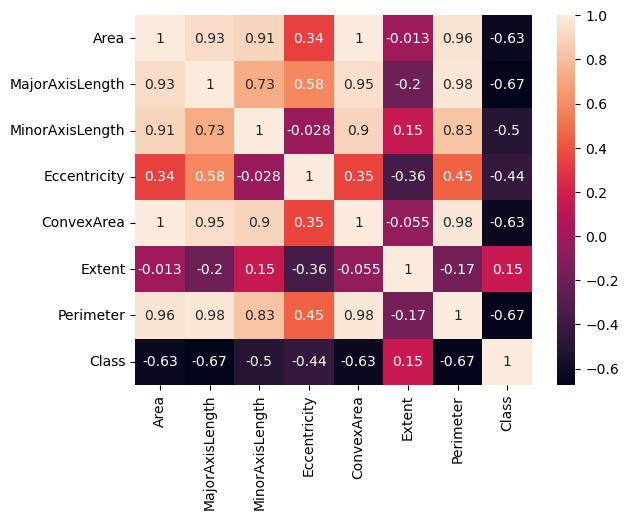

In [103]:
sns.heatmap(corr,annot=True)

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
lr=LabelEncoder()

In [106]:
data['Class']=lr.fit_transform(data['Class'])

In [107]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [108]:
x=data.drop(['Class'],axis=1)

In [109]:
y=data['Class']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scalar=StandardScaler()

In [114]:
x_train=scalar.fit_transform(x_train)

In [115]:
x_test=scalar.transform(x_test)

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
from sklearn.svm import SVC

In [118]:
svm=SVC()

In [119]:
param_grid={
    'C':[0.1,1,10,100],
    'gamma':[0.001,0.01,0.1,1],
    'kernel':['rbf']
}

In [120]:
grid_search=GridSearchCV(svm,param_grid=param_grid,cv=10,scoring='accuracy')

In [121]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [122]:
best_parameters=grid_search.best_params_

In [123]:
print(best_parameters)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [124]:
model=grid_search.best_estimator_

In [125]:
print(model)

SVC(C=1, gamma=0.1)


In [126]:
model.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [127]:
print(model)

SVC(C=1, gamma=0.1)


In [128]:
y_pred=model.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score, classification_report

In [130]:
print(accuracy_score(y_pred,y_test))

0.8666666666666667


In [131]:
df=pd.DataFrame(grid_search.cv_results_)

In [132]:
df[['param_C','param_gamma','param_kernel','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_C,param_gamma,param_kernel,mean_test_score
6,1,0.1,rbf,0.880952
13,100,0.01,rbf,0.877778
8,10,0.001,rbf,0.876190
5,1,0.01,rbf,0.873016
9,10,0.01,rbf,0.873016
10,10,0.1,rbf,0.873016
2,0.1,0.1,rbf,0.871429
12,100,0.001,rbf,0.871429
14,100,0.1,rbf,0.871429
7,1,1,rbf,0.869841


In [133]:
print(model)

SVC(C=1, gamma=0.1)
